In [12]:
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import config

def plot_r2(model):
    destination_dir = Path(config.CUR_DIR, 'Results', 'Images')
    root_dir = config.TRAINED_DIR
    subject_r2_scores = {}
    fontsize=30
    for subject in sorted(os.listdir(root_dir)):
        subject_path = os.path.join(root_dir, subject, "Mapping", model)
        if os.path.exists(subject_path):
            r2_scores = []
            for fold_file in sorted(os.listdir(subject_path)):
                if fold_file.endswith(".npy"):
                    fold_path = os.path.join(subject_path, fold_file)
                    values = np.load(fold_path)
                    r2_scores.append(values[2])  # Extract R² score

            if r2_scores:
                subject_r2_scores[subject] = r2_scores

    subject_means = {subject: np.mean(scores) for subject, scores in subject_r2_scores.items()}

    print("Mean R² scores for each subject:")
    for subject, mean_score in subject_means.items():
        print(f"{subject}: {mean_score:.4f}")

    subjects = []
    scores = []
    for subject, r2_values in subject_r2_scores.items():
        subjects.extend([subject] * len(r2_values))
        scores.extend(r2_values)

    data = pd.DataFrame({"Subjects": subjects, "R²": scores})

    # Plotting
    sns.set(style="whitegrid", font_scale=1.4)
    plt.figure(figsize=(16, 8))

    sns.stripplot(
        data=data,
        x="Subjects",
        y="R²",
        color="gray",
        size=7,
        alpha=0.7,
        jitter=True
    )
    ax = sns.boxplot(
        data=data,
        x="Subjects",
        y="R²",
        palette="Spectral",
        showmeans=True,
        meanprops={
            "marker": "D",
            "markerfacecolor": "black",
            "markeredgecolor": "white",
            "markersize": 9
        },
        boxprops={"linewidth": 2},
        whiskerprops={"linewidth": 2},
        capprops={"linewidth": 2},
        medianprops={"linewidth": 2, "color": "red"},
    )

    

    plt.ylim([-1.75, 1.05])
    plt.xlabel("Subjects", fontsize=fontsize, fontweight="bold", color="#002244")
    plt.ylabel("R² Score", fontsize=fontsize, fontweight="bold", color="#002244")

    plt.xticks(rotation=45, fontsize=fontsize-2, fontweight="bold", color="black")
    plt.yticks(fontsize=fontsize-2, fontweight="bold", color="black")

    plt.grid(axis="y", linestyle="--", linewidth=0.6, alpha=0.7)
    plt.tight_layout()

    # Save plot
    os.makedirs(destination_dir, exist_ok=True)
    filename = Path(destination_dir, f'{model}.pdf')
    plt.savefig(filename, dpi=600, format='pdf', bbox_inches="tight")

    plt.show()
    return subject_means


Mean R² scores for each subject:
01: 0.8724
02: 0.9446
03: 0.8816
04: 0.9909
05: 0.7965
06: 0.9122
07: 0.5928
08: 0.8744
09: 0.5336


C:\Users\Owais Mujtaba\AppData\Local\Temp\ipykernel_6448\3173935786.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


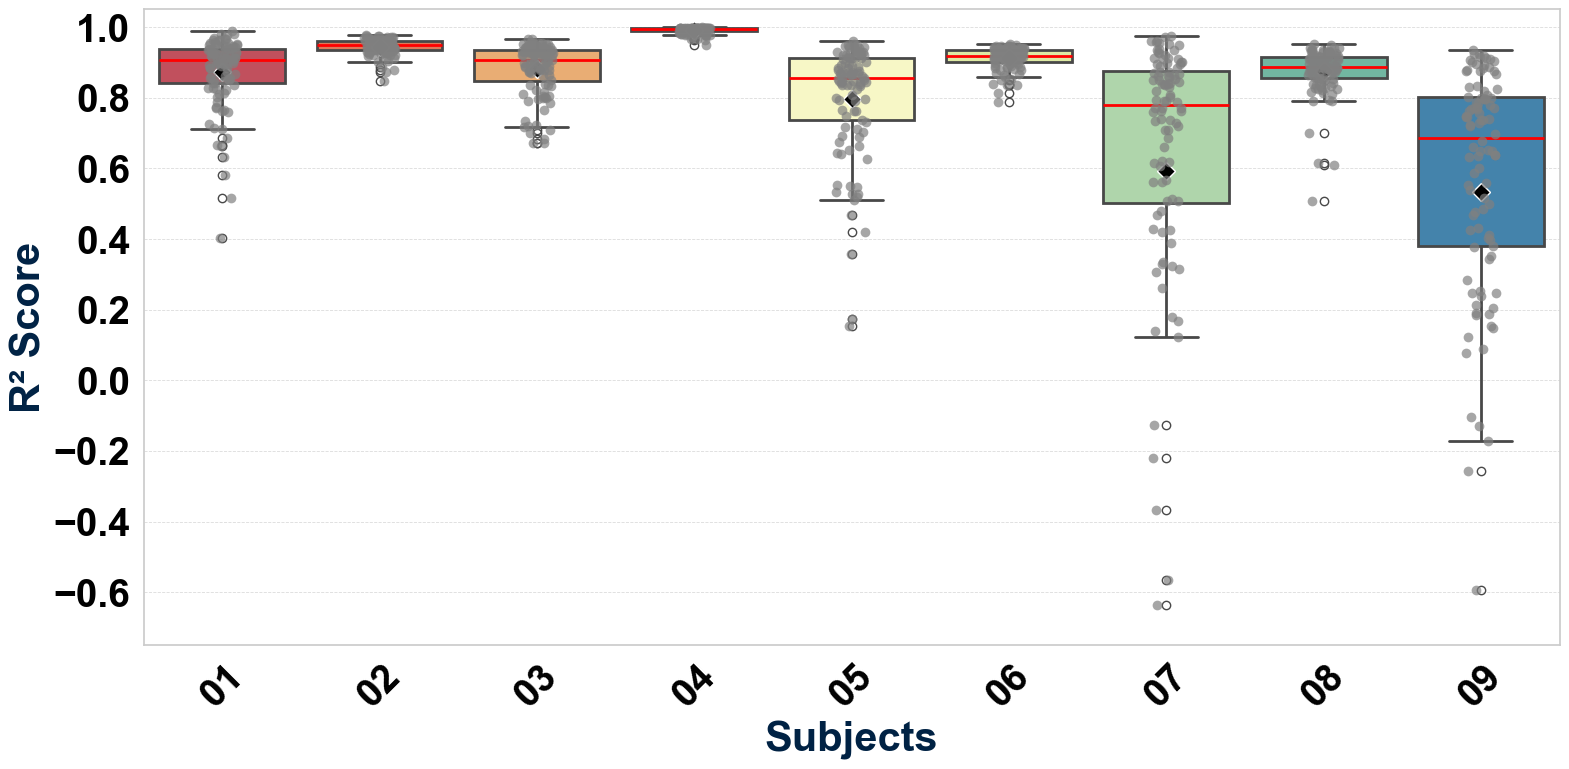

Mean R² scores for each subject:
01: 0.8733
02: 0.9446
03: 0.8814
04: 0.9908
05: 0.7960
06: 0.9125
07: 0.6049
08: 0.8747
09: 0.5351


C:\Users\Owais Mujtaba\AppData\Local\Temp\ipykernel_6448\3173935786.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


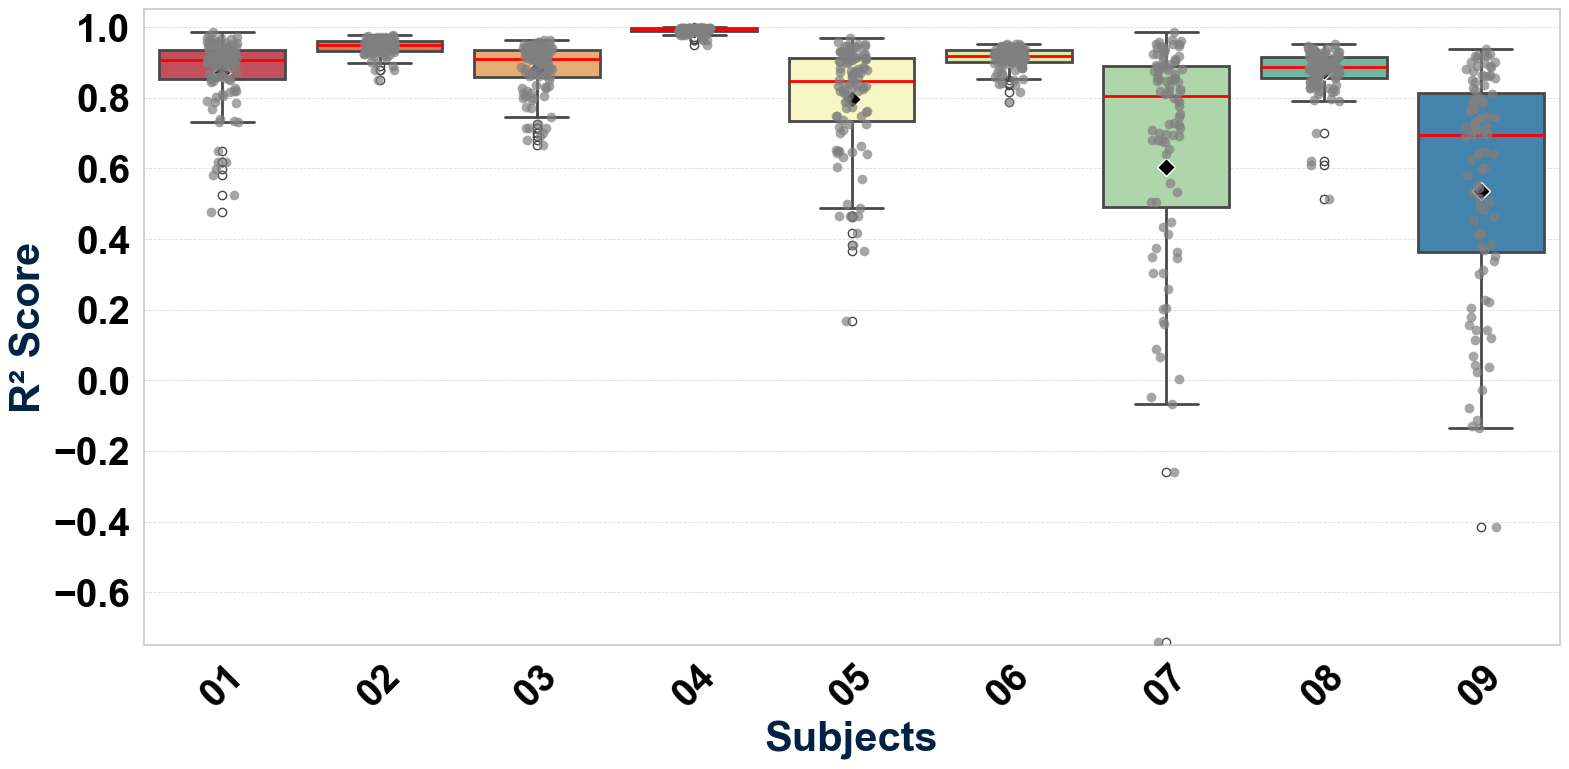

In [11]:

chat = plot_r2(model='ElasticNet_ChatGPT')
fast = plot_r2(model='ElasticNet_FastText')


Mean R² scores for each subject:
01: 0.7148
02: 0.9445
03: 0.7941
04: 0.9852
05: 0.5802
06: 0.8990
07: 0.0237
08: 0.8783
09: -0.2935


C:\Users\Owais Mujtaba\AppData\Local\Temp\ipykernel_6448\1789202438.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


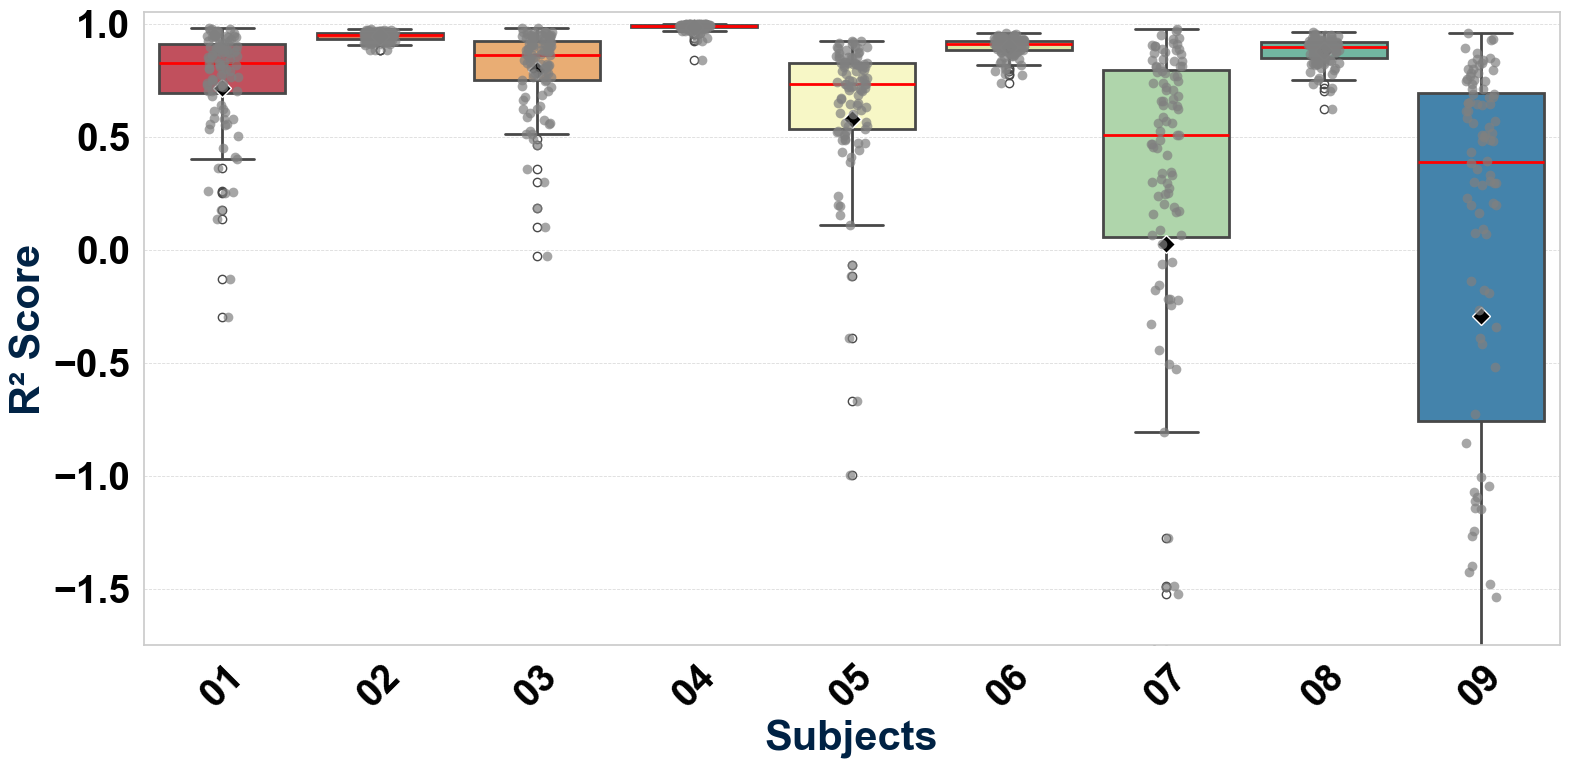

In [13]:
wav = plot_r2(model='ElasticNet_Wav2Vec')

In [192]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import config

def plot_r2_vs_trials_all_subjects_in_bins(model):
    root_dir = config.TRAINED_DIR
    destination_dir = Path(config.CUR_DIR, 'Results', 'Images')

    plt.figure(figsize=(12, 6))

    # Get color cycle from Matplotlib
    color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
    color_index = 0  # Track index for cycling through colors

    # Dictionary to track occupied y-positions in each bin to prevent text overlap
    occupied_positions = {}

    # Loop through subjects and plot on the same figure
    for subject in sorted(os.listdir(root_dir)):
        subject_path = os.path.join(root_dir, subject, "Mapping", model)
        all_r2_scores = []
        print(subject)
        if os.path.exists(subject_path):
            for fold_file in sorted(os.listdir(subject_path)):
                if fold_file.endswith(".npy"):
                    fold_path = os.path.join(subject_path, fold_file)
                    values = np.load(fold_path)
                    r2_value = values[2]  # Extract R² score
                    all_r2_scores.append(r2_value)

        if not all_r2_scores:
            print(f"No R² scores found for subject {subject}.")

            continue
        print(all_r2_scores)
        # Create bins from 0 to 1 with a 0.1 step
        bins = np.arange(0, 1.1, 0.05)

        # Count occurrences of each R² score in the bins
        binned_data = pd.cut(all_r2_scores, bins=bins)
        trial_counts = pd.value_counts(binned_data, sort=False)

        # Get color from cycle
        line_color = color_cycle[color_index % len(color_cycle)]
        color_index += 1  # Increment color index for next subject

        # Line plot for each subject
        plt.plot(trial_counts.index.astype(str), trial_counts.values, marker='o', linestyle='--', 
                 label=f"Subject {subject}", color=line_color)

        # Annotate each point with the number of trials (excluding zeros)
        for i, (bin_label, count) in enumerate(zip(trial_counts.index.astype(str), trial_counts.values)):
            if count > 0:  # Only annotate non-zero values
                # Determine an available y-position to avoid overlap
                y_position = count
                while (i, y_position) in occupied_positions:  # Shift up if space is occupied
                    y_position += 3

                # Mark this position as occupied
                occupied_positions[(i, y_position)] = True

                #plt.text(i, y_position, str(count), fontsize=12, ha='center', va='bottom', 
                        # color=line_color, fontweight='bold')

    # Plot labels and title
    plt.xlabel("R²", fontsize=18, fontweight="bold", color="#003366")
    plt.ylabel("No. of Trials", fontsize=18, fontweight="bold", color="#003366")

    plt.xticks(rotation=45, fontsize=18,fontweight="bold",color="black")  
    plt.yticks(fontsize=18,fontweight="bold",  color="black")  

    # Add legend to distinguish subjects
    plt.legend(title="Subjects", fontsize=12, title_fontsize=14)

    plt.tight_layout()

    # Save plot
    os.makedirs(destination_dir, exist_ok=True)
    filename = Path(destination_dir, f'{model}_r2_vs_#trials.pdf')
    plt.savefig(filename, dpi=800, format='pdf', bbox_inches="tight")

    


01
[0.8685581918067529, 0.9256268981011075, 0.8454651497561372, 0.9105478441024151, 0.7520171546826961, 0.8800412603465977, 0.8887570762990578, 0.9567140348514787, 0.9402972034748098, -0.2991239077931147, 0.7385177960161989, 0.9240608615340145, 0.554794978053497, 0.7204714393426697, 0.41126359942010504, 0.5776764642748746, 0.9133447160399748, 0.8005787601357492, 0.5501044851302167, 0.9403345252151792, 0.624225257164694, 0.8789952756798565, 0.25681144113940846, 0.9588972501485551, 0.8776327818519428, 0.7304008681874214, 0.9762157724432982, -0.1297772072158916, -2.9574061521691313, 0.8476980474895925, 0.8684853130138239, 0.9333608281116416, 0.7794806699664136, 0.7660705188901896, 0.8072123833158789, 0.9783164934276621, 0.4502231032345898, 0.8280365174454892, 0.83205193058733, 0.8590581468248807, 0.8002220910856271, 0.679457724443524, 0.8161185320470502, 0.9032511154350088, 0.7005711968615373, 0.7286342041760865, 0.8728246898728106, 0.13460470779637568, 0.8918147091245012, 0.8165682151738

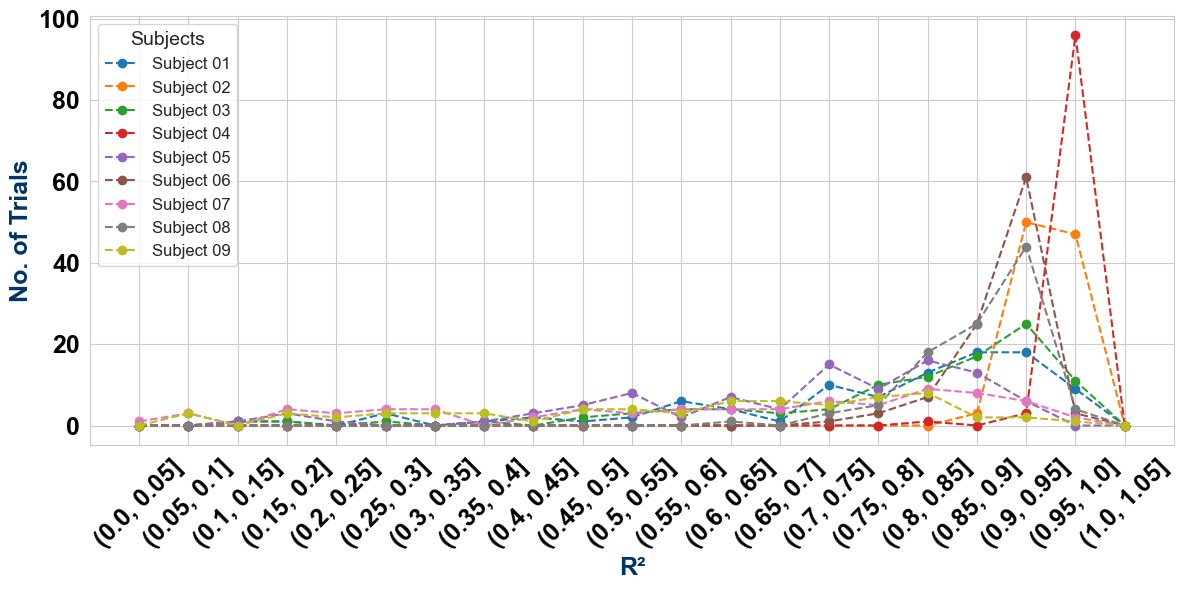

In [ ]:
#ax1= plot_r2_vs_trials_all_subjects_in_bins(model='ElasticNet_ChatGPT')
#ax2 = plot_r2_vs_trials_all_subjects_in_bins(model='ElasticNet_FastText')
#ax3= plot_r2_vs_trials_all_subjects_in_bins(model='ElasticNet_Wav2Vec')